### So, What does the Paper Say

Online batch selection is a fairly well known method to train on a subset of the training data without sacrificing performance, it trains on points that would minimize the _training_ set loss. The paper introduces reducible holdout loss (RHO-LOSS) that selects points that minimize the holdout set loss.

The paper shows how to find points that would most reduce the holdout set loss if the current model is trained on them without actually training the current model on them.

Consider, for simplicity, the process for selecting the **next** best point, i.e given the current model p(y' | x', D), we seek to find point (x, y) that minimizes the NLL on the holdout set, i.e -logp(y^{ho} | x^{ho} , D U {(x, y)}).


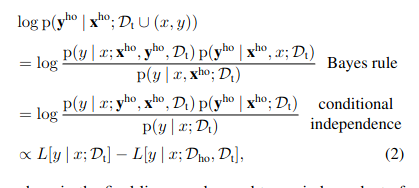


We can therefore do the following:
1. Train the model on Dho and Dt, and then at each Dt compute the loss. 

This poses a problem because it would involve training the second model after each point is acquired. The paper suggests an approximation, by replacing L(y | x, D_t, D_ho) with L(y | x, D_ho). This means we can simply train the model on a holdout set before each epoch, and then use that to select points.

The loss L(y | x, D_ho) is called the _irreducible_ holdout loss and is by definition the lowest possible loss on (x,y) without actually training on it in the limit of D_ho being large. 

Approximation 3: Use a smaller version of model with bad accuracy to train on  D_ho, and use it over many runs amortizing its cost.

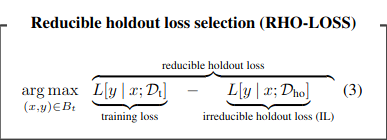




In [1]:
import pandas as pd

In [16]:
z = pd.read_csv("data/ngram_freq.csv")

In [17]:
z = z['word'].to_numpy()

In [11]:
z

array(['the', 'of', 'and', ..., 'rutionale', 'snral', 'suprlv'],
      dtype=object)

In [18]:
import numpy as np

In [19]:
np.random.shuffle(z)

In [22]:
import sklearn

In [23]:
train, test, val = np.split(z, [int(.5*len(z)), int(.8*len(z))])

In [ ]:
z = list(z)

In [ ]:
with open("data/train.txt", "w+") as w:
    